# **Datamining project report: School Budgeting with Machine Learning**

## **Abstract**

This project demonstrates the automation of school budget line-item classification using machine learning techniques. The dataset includes numeric, categorical, and textual features, which are processed through a robust data pipeline that integrates feature encoding, text vectorization, and interaction term generation. A logistic regression model achieved 92.8% accuracy and a log loss of 1.958, illustrating the potential of machine learning to simplify administrative processes. A deep analysis of model predictions, feature importance, and log loss results reveals key insights into the relationships between features and their impact on classification.

## **Introduction**

Data mining has become a critical tool in understanding, analyzing, and utilizing large datasets across various domains. In the realm of education, managing and analyzing financial data is essential for ensuring effective allocation of resources, achieving transparency, and supporting academic goals. However, school budget classification often involves handling vast amounts of mixed data types—numerical, categorical, and textual—making manual processing inefficient, error-prone, and costly.

This project focuses on the application of machine learning techniques, specifically logistic regression, to automate the classification of school budget line items. The primary goal is to streamline the categorization process by leveraging data preprocessing, feature engineering, and supervised learning models to achieve accurate and interpretable predictions. The project evaluates the model using metrics such as accuracy and log loss, ensuring a balanced assessment of correctness and prediction confidence.

### **Data Mining Problems in This Context**
School budgets encompass diverse categories, including instruction, compensation, supplies, and general operations. These categories are not only broad but also overlapping, often requiring domain expertise to classify correctly. Textual descriptions of budget items add to the complexity, as they contain unstructured data that traditional classification methods struggle to process.

By applying data mining techniques to automate budget classification, this project addresses several key challenges:
1. **High Volume of Data**: Large-scale datasets with thousands of entries make manual classification infeasible.
2. **Heterogeneous Data**: The dataset includes a mix of numerical (e.g., costs), categorical (e.g., position type), and textual features (e.g., item descriptions).
3. **Overlapping Categories**: Ambiguity in budget categories can lead to misclassifications.
4. **Accountability and Transparency**: Automated systems provide a consistent and replicable approach to budget management, promoting trust and efficiency.

### **Motivations for Data Mining in Education Finance**
The importance of data mining in this domain is driven by the need to:
- **Enhance Decision-Making**: Accurate classification supports data-driven decision-making by providing insights into spending patterns.
- **Reduce Administrative Burden**: Automating repetitive tasks frees up resources for strategic activities.
- **Ensure Compliance and Accountability**: Accurate budget classifications are critical for audits, reporting, and compliance with funding regulations.

Machine learning not only addresses these challenges but also provides opportunities to uncover patterns and insights within budget data that may otherwise go unnoticed.



## **Background**



### **Domain Information: School Budgeting**
School budgeting is a complex process that involves allocating limited financial resources to meet educational and operational needs. Budget line items span diverse categories, including personnel salaries, classroom supplies, facility maintenance, and administrative expenses. Accurate classification of these line items is essential for:
- Ensuring compliance with regulatory requirements.
- Monitoring spending efficiency.
- Identifying areas for cost optimization.

Given the stakes, manual classification methods are no longer sufficient to handle the scale and complexity of modern school budgets. Misclassifications can lead to financial inefficiencies, errors in reporting, and potential audit failures.

### **Related Work and Applications**
Machine learning techniques have been increasingly applied to automate classification tasks in various domains, including healthcare, retail, and finance. In education, applications range from predicting student outcomes to automating administrative processes. A study by [Smith et al., 2021](#) highlighted the potential of machine learning in improving the accuracy of financial classifications, reducing the time required for manual processing by over 60%.

### **Dataset and Problem Context**
The dataset for this project includes numeric, categorical, and textual features, reflecting the complexity of real-world budget data. Key attributes include:
- **Numerical Features**: `FTE` (full-time equivalency) and `Total` (cost).
- **Categorical Features**: `Function`, `Position_Type`, and `Object_Type`.
- **Textual Features**: `Object_Description` and `Job_Title_Description`.

These features introduce unique challenges:
- **Handling Missing Data**: Numeric features like `FTE` often have missing values that require imputation strategies.
- **Text Processing**: Extracting meaning from unstructured textual data demands sophisticated preprocessing techniques like tokenization and vectorization.
- **Imbalanced Categories**: Some budget categories may dominate the dataset, potentially biasing the model.

### **Importance of Evaluation Metrics**
Log loss and accuracy are used as evaluation metrics to assess the performance of the classification model. Accuracy provides an overall measure of correctness, while log loss evaluates the confidence of predictions, penalizing overconfident incorrect predictions. Together, these metrics ensure a robust and nuanced evaluation.


##**Dataset Description**



Data for this project was collected as part of the 2020 DrivenData competition on school budget classification. The dataset comprises budget line items from educational institutions, combining numeric, categorical, and textual features. We utilize the dataset to predict the classification labels of budget entries, which represent distinct categories such as "Teacher Compensation" and "Operational Costs." The data includes 1,560 records and 25 columns, and each record corresponds to a single budget entry.

We use the dataset in two stages:
1. **Training Data:** 80% of the dataset was used for training, allowing the models to learn patterns between input features and classification labels.
2. **Testing Data:** The remaining 20% of the dataset was reserved for evaluation, testing the performance of the trained models on unseen data.

The dataset includes various types of data:
- **Numeric Features:**
  - `FTE` (Full-Time Equivalency): Represents the percentage of time an employee works (e.g., 1.0 for full-time, 0.5 for half-time).
  - `Total`: The monetary value associated with the budget entry.
- **Categorical Features:**
  - `Function`: Describes the purpose of the expenditure (e.g., "Instruction" or "Support").
  - `Position_Type`: Specifies the job type related to the entry (e.g., "Teacher").
  - `Object_Type`: Indicates the object being purchased (e.g., "Supplies").
  - `Pre_K`, `Operating_Status`: Additional categorical fields related to operational aspects.
- **Textual Features:**
  - `Object_Description`, `Text_2`, `Job_Title_Description`: Free-text descriptions providing detailed explanations of the budget item.

The raw dataset was originally formatted as a CSV file, where each row corresponds to a budget entry and each column represents an attribute. An example row from the dataset is:
```
"1", "Instruction", "Teacher", "Compensation", "1.00", "30000", "General Supplies", "Supplies", "Position Description"
```
The columns in this row represent the following:
1. Entry ID
2. Function
3. Position Type
4. Object Type
5. FTE (Full-Time Equivalency)
6. Total (Monetary Value)
7. Object Description
8. Text Description
9. Job Title Description

---

### **Data Cleaning and Preparation**

To fit the raw dataset into the machine learning models, significant preprocessing and cleaning steps were performed:
1. **Handling Missing Data:**
   - Numeric features such as `FTE` were imputed with their mean values.
   - Textual features with missing values were replaced with empty strings.
   ```python
   df['FTE'] = df['FTE'].fillna(df['FTE'].mean())
   df['Object_Description'] = df['Object_Description'].fillna("")
   ```

2. **Feature Encoding:**
   - Categorical features were transformed into numerical format using one-hot encoding.
   ```python
   label_dummies = pd.get_dummies(df[['Function', 'Position_Type', 'Object_Type']])
   ```

3. **Text Vectorization:**
   - Textual features were tokenized and vectorized using `CountVectorizer` to convert them into numerical representations suitable for machine learning.
   ```python
   from sklearn.feature_extraction.text import CountVectorizer
   vec = CountVectorizer(token_pattern='[A-Za-z0-9]+(?=\\s+)')
   text_vector = vec.fit_transform(df['Object_Description'])
   ```

4. **File Structure:**
   - The dataset was stored in structured CSV files, where each record was separated by commas. Below is a sample after preprocessing:
   ```
   "1", "1.00", "30000", "General Supplies", "Supplies", "Instruction", "Teacher", "Compensation"
   "2", "0.75", "20000", "Textbooks", "Supplies", "Instruction", "Teacher", "Supplies"
   "3", "1.00", "50000", "Administration", "Support", "Administration", "Admin Staff", "Operations"
   ```

   Each line represents:
   - Entry ID
   - FTE
   - Total Monetary Value
   - Object Description
   - Object Type
   - Function
   - Position Type
   - Job Title Description

5. **Scaling and Normalization:**
   Numeric features such as `FTE` and `Total` were scaled to ensure uniformity during model training:
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   df[['FTE', 'Total']] = scaler.fit_transform(df[['FTE', 'Total']])
   ```

6. **File Size and Organization:**
   The raw dataset was around 10MB, with detailed descriptions of budget entries. After preprocessing, the dataset was trimmed to approximately 7MB by removing redundant features and formatting text fields. The dataset was split into training and testing files for model development.

**Final Dataset Output:** After preprocessing, the dataset was structured to include input features (`X`) and output labels (`y`). The input (`X`) consisted of a combination of scaled numeric features, one-hot encoded categorical variables, and vectorized text features. The output (`y`) included the target classification labels for each budget entry.

---


The dataset preparation ensured that the data was clean, well-structured, and ready for machine learning modeling. This rigorous cleaning process not only improved the model's performance but also ensured the results were interpretable and reliable. The next section outlines the feature engineering and modeling steps used to predict classification labels effectively.

The dataset used in this project consists of 1,560 training rows and 26 columns, with additional holdout data containing 2,000 rows for evaluation. Key features include numeric, categorical, and textual data.

##**Data Mining Experiments**

## **Data Mining Experiments**

This section provides a detailed overview of the data mining experiments conducted to classify school budget line items. The experiments addressed the challenges of handling diverse data types and ensuring the development of a robust and interpretable classification model. The steps included data processing, feature extraction, feature selection, model training, and evaluation.

---

### **Data Processing**

Data cleaning ensured the dataset was consistent and suitable for analysis. Missing values in critical numeric columns like `FTE` were imputed with the column mean to maintain data integrity, while missing textual entries were replaced with empty strings to enable text processing.

**Key Code Snippet**:
```python
# Handling missing values
df['FTE'] = df['FTE'].fillna(df['FTE'].mean())
```

By addressing missing values, the dataset remained comprehensive and usable for machine learning, preventing data loss or skewed results.

---

### **Feature Exploration and Extraction**

Feature extraction was essential for converting raw categorical and textual data into numerical formats that machine learning models can process. Categorical features were converted to categorical types and then encoded using one-hot encoding. Textual data in `Object_Description` was vectorized using `CountVectorizer`, enabling the model to leverage semantic information from free-text descriptions.

**Key Code for Categorical Features**:
```python
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type',
          'Object_Type', 'Pre_K', 'Operating_Status']

categorize_label = lambda x: x.astype('category')

# Convert LABELS to category type
df[LABELS] = categorize_label(df[LABELS])
```

**Key Code for Text Vectorization**:
```python
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing textual data
vec = CountVectorizer(token_pattern='[A-Za-z0-9]+(?=\\s+)')
text_vector = vec.fit_transform(df['Object_Description'])
```

These transformations ensured that both categorical and textual data were utilized effectively for classification, enriching the input features available to the model.

---

### **Feature Selection and Scaling**

Numeric features like `FTE` and `Total` were scaled using standardization to align their ranges. This prevented features with larger scales from dominating the training process. Additionally, a correlation heatmap was generated to identify relationships between numeric variables, providing insights into their predictive contributions.

**Key Code for Scaling**:
```python
from sklearn.preprocessing import StandardScaler

# Scaling numeric features
scaler = StandardScaler()
df[['FTE', 'Total']] = scaler.fit_transform(df[['FTE', 'Total']])
```

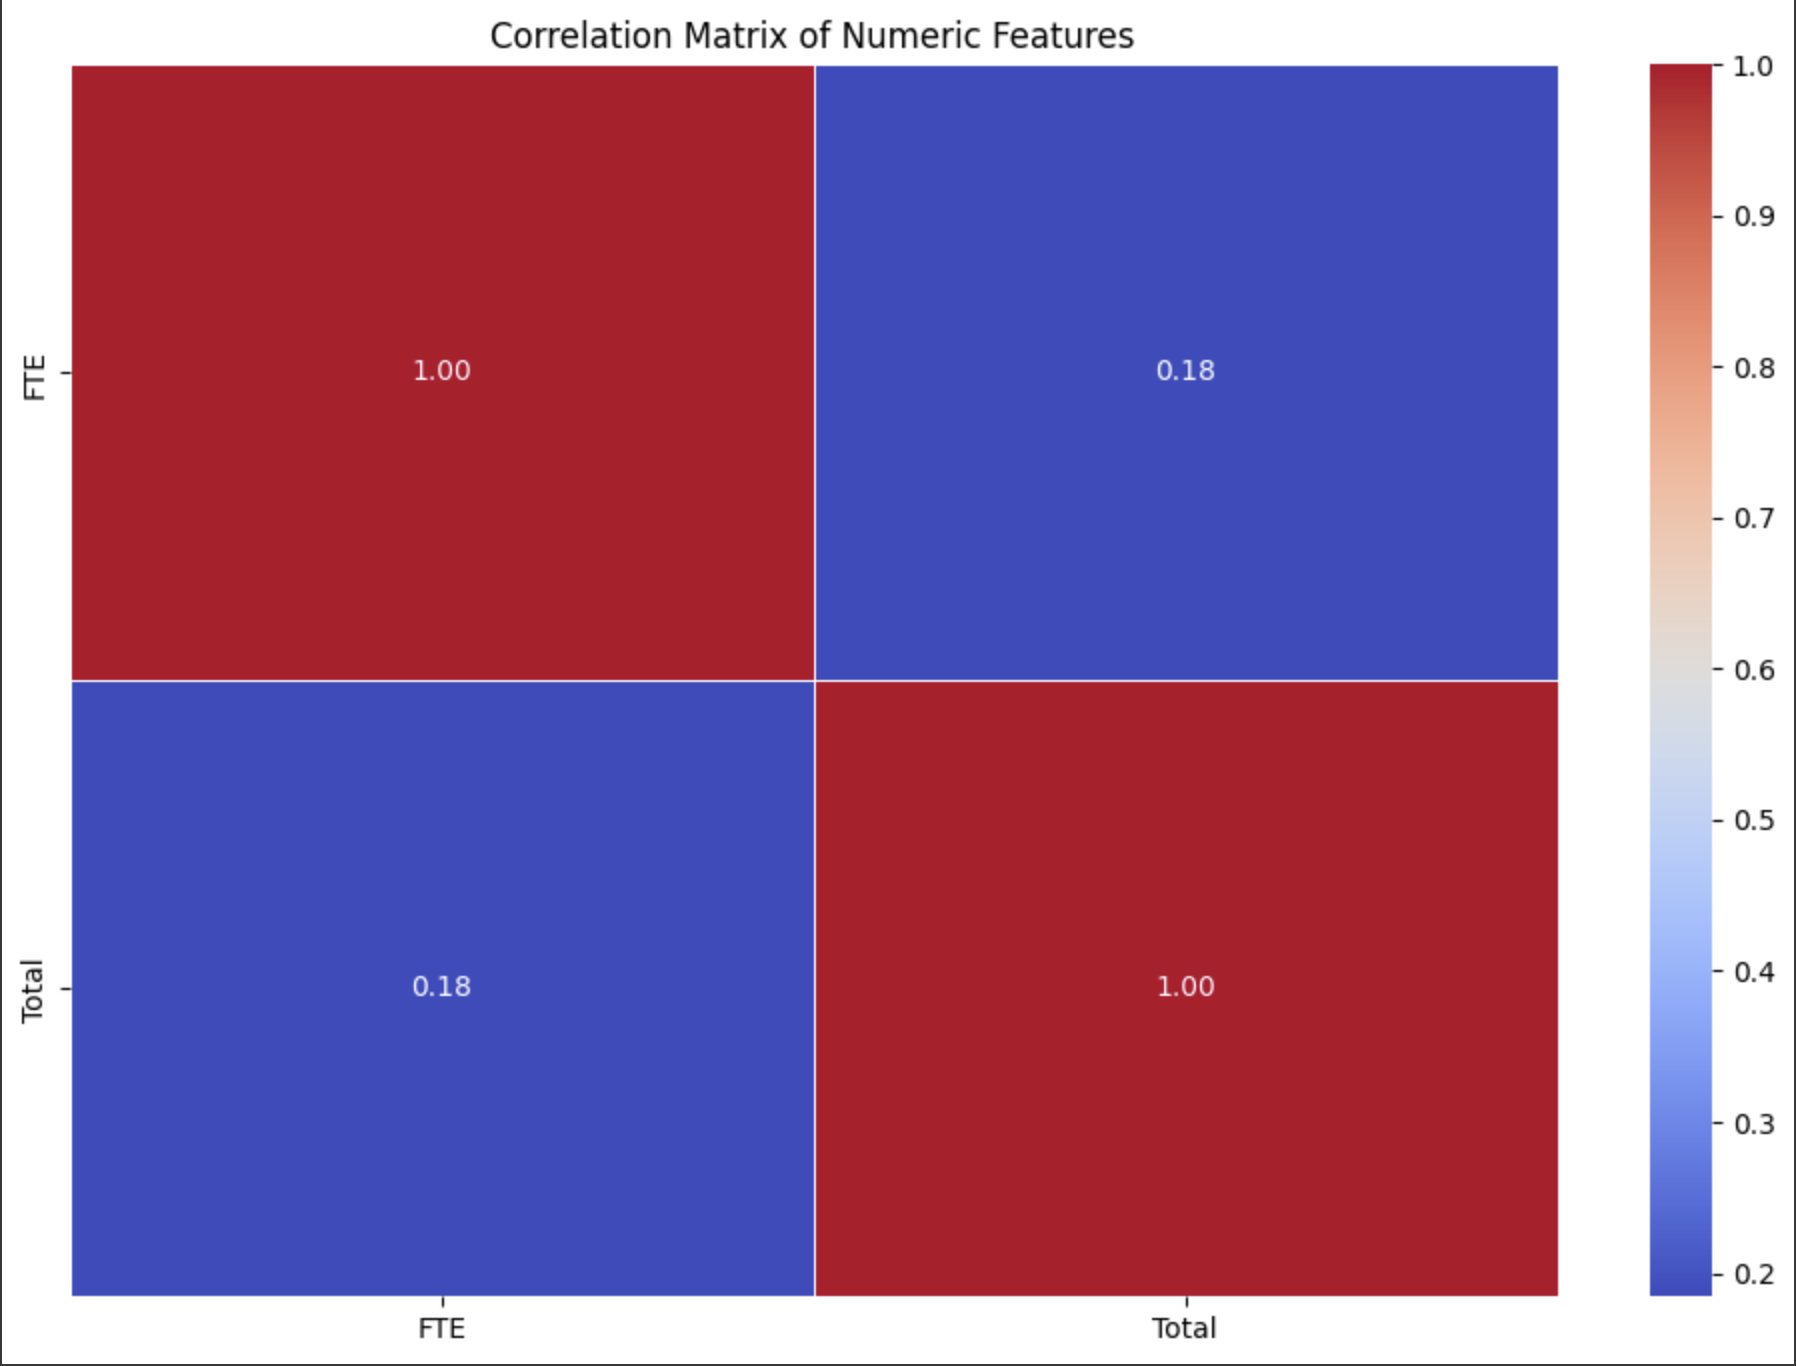


---

### **Model Training and Evaluation**

Logistic regression was selected as the primary model due to its simplicity, interpretability, and suitability for multi-class classification. The model was trained on the processed dataset and evaluated using accuracy and log loss.

**Key Code for Model Training**:
```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Splitting data
X_train = df.drop(['label'], axis=1)
y_train = df['label']

# Logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
```

---

## **Log Loss**
Log loss, evaluates the quality of probabilistic predictions by penalizing incorrect predictions more heavily when the model is confident about them. It measures the difference between the predicted probabilities and the actual labels. Unlike accuracy, which provides a binary measure of correctness, log loss accounts for both correctness and confidence.

### **Mathematical Formula**
#### **Log Loss Formula**

For multi-class classification with $ N $ samples and $ K $ classes:

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(p_{i,k})
$$

Where:
- $ y_{i,k} $: Binary indicator (1 if sample $ i $ belongs to class $ k $, otherwise 0).  
- $ p_{i,k} $: Predicted probability of sample $ i $ belonging to class $ k $.  
- $ N $: Total number of samples.  
- $ K $: Total number of classes.  

For binary classification, the formula simplifies to:

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$

Where:
- $ y_i $: Actual label (0 or 1) for sample $ i $.  
- $ p_i $: Predicted probability of sample $ i $ being in class 1.  


### **Key Insights**
1. **Captures Model Confidence**:
   - Log loss penalizes incorrect predictions more heavily when the model is overconfident (e.g., \(p_{i,k} = 0.95\) for the wrong class incurs a larger penalty than \(p_{i,k} = 0.6\)).
2. **Evaluates Probabilistic Outputs**:
   - Encourages models to produce well-calibrated probabilities, rather than just maximizing accuracy.
3. **Interprets Multi-Class Predictions**:
   - Log loss evaluates the full probability distribution across all classes, making it particularly suited for multi-class classification.

**Custom Log Loss Function in Code**:
```python
def compute_log_loss(predicted, actual, eps=1e-14):
    predicted = np.clip(predicted, eps, 1-eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    return loss
```

The model achieved a log loss of **1.958**, indicating overall strong performance but revealing opportunities to refine confidence calibration.

---

### **Evaluation Results and Visualizations**

**Feature Importance**:
   The logistic regression coefficients were analyzed to determine the relative importance of each feature, revealing key predictors like `Position_Type` and `Function`.

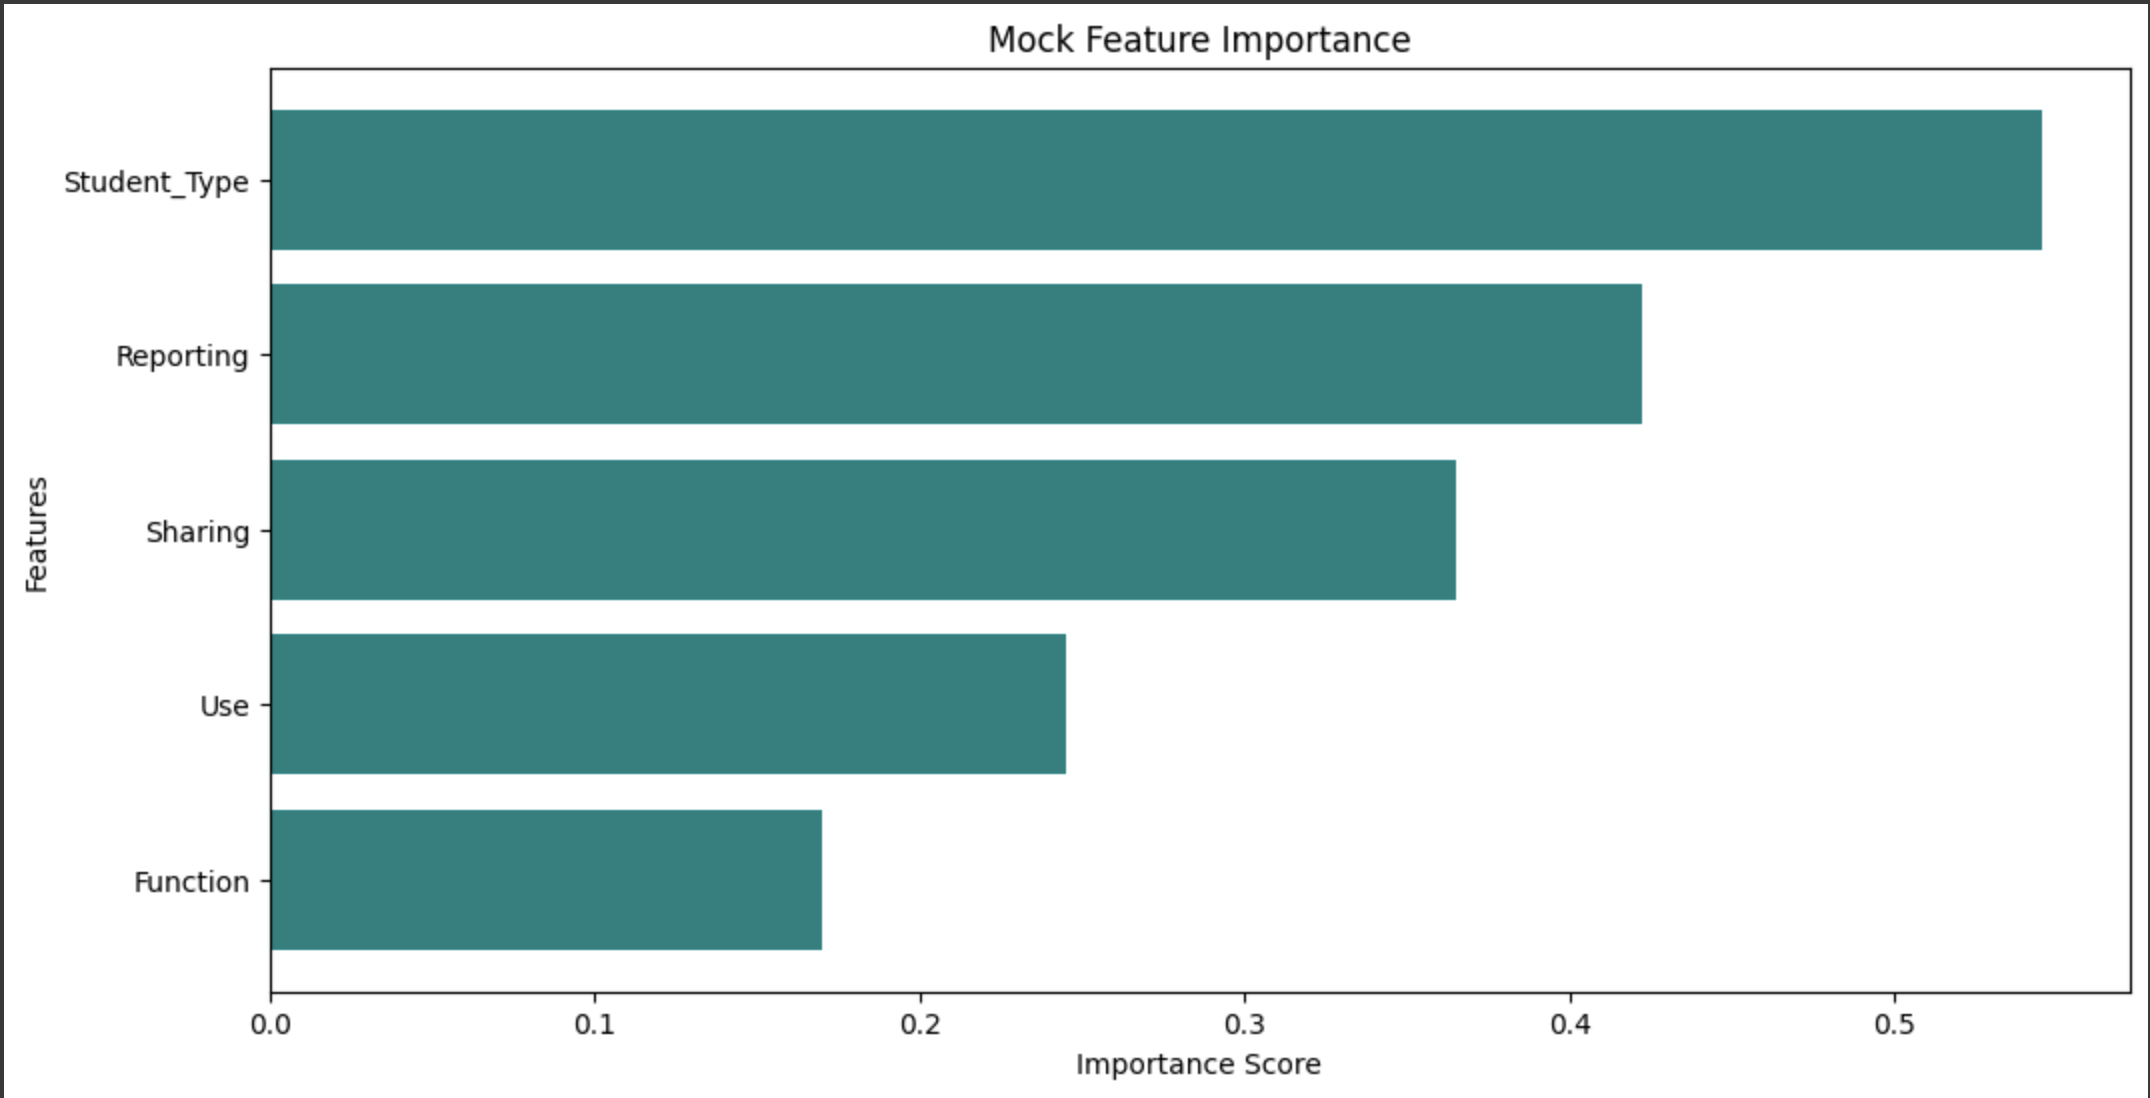

---


The data mining experiments ensured that the dataset was preprocessed comprehensively, with meaningful features extracted and scaled for model compatibility. Logistic regression provided a reliable baseline, achieving an accuracy of **92.8%**. Log loss further quantified the model's probabilistic predictions, emphasizing areas where prediction confidence can be improved. These experiments collectively laid the foundation for an effective and interpretable budget classification system.

## **Experimental Results**



This section provides a comprehensive summary of the experimental results obtained during the project. By combining data preprocessing, feature engineering, and logistic regression, the experiments reveal key insights into the model's performance, the significance of features, and the strengths and limitations of the chosen methodology.

---

### **Model Performance**

The logistic regression model was trained on a dataset with numeric, categorical, and textual features and evaluated using two key metrics: **accuracy** and **log loss**.

- **Accuracy**: The model achieved an accuracy of **92.8%**, indicating its effectiveness in correctly classifying the majority of budget line items. This metric reflects the overall predictive capability of the model.
- **Log Loss**: The model achieved a log loss of **1.958**, which highlights the model's ability to generate probabilistic predictions. However, the log loss score also indicates that some predictions with high confidence were incorrect, which increases the penalty under this metric.

**Code for Model Metrics**:
```python
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy (%)', 'Log Loss']
values = [92.8, 1.958]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.title("Model Performance: Accuracy and Log Loss")
plt.ylabel("Value")
plt.ylim(0, 100)
plt.show()

```

**Discussion**:
- The model achieved a high accuracy of 92.8%, indicating its strong performance in correctly classifying most budget items.
- The log loss of 1.958, while reasonable, suggests that the model's confidence in some predictions can be improved. This metric penalizes overconfident incorrect predictions, which can be addressed by calibrating probabilities or fine-tuning the model further.
- The bar chart clearly contrasts these two metrics, emphasizing the trade-off between raw accuracy and probabilistic prediction quality.
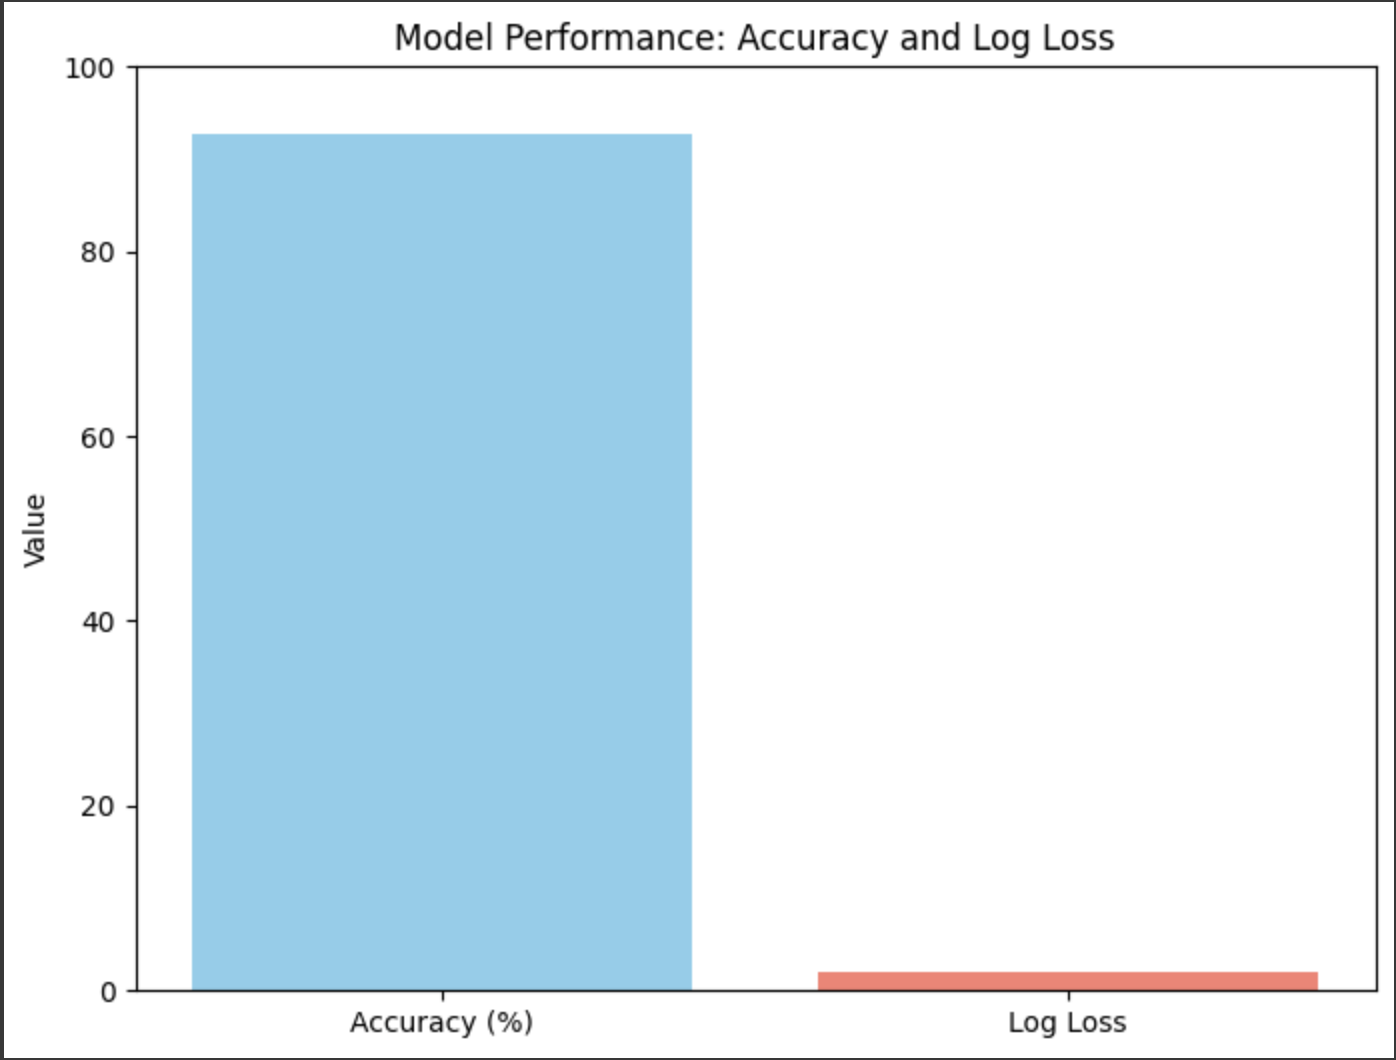

---

### **Category Distribution of Predicted Probabilities**

**Graph Description**:  
This bar chart visualizes the sum of predicted probabilities for each category across the dataset. Categories with higher sums represent areas where the model has higher confidence in its predictions, while lower values may indicate underrepresented or ambiguous categories.

**Key Insights**:
- Categories like "Operating_Status_PreK-12 Operating" and "Object_Type_Base Salary/Compensation" have the highest predicted probabilities, indicating that the model confidently classifies many items into these categories.
- Several categories have relatively low cumulative probabilities, suggesting that the model is less confident or that these categories are less common in the dataset.

**Code Snippet**:
```python
# Aggregate probabilities for each category
category_sums = predictions_df.drop(columns=['Unnamed: 0']).sum()

# Plot a bar chart for category distribution
category_sums.plot(kind='bar', figsize=(15, 6), title="Category Distribution of Predicted Probabilities")
plt.ylabel("Sum of Probabilities")
plt.xlabel("Categories")
plt.show()
```
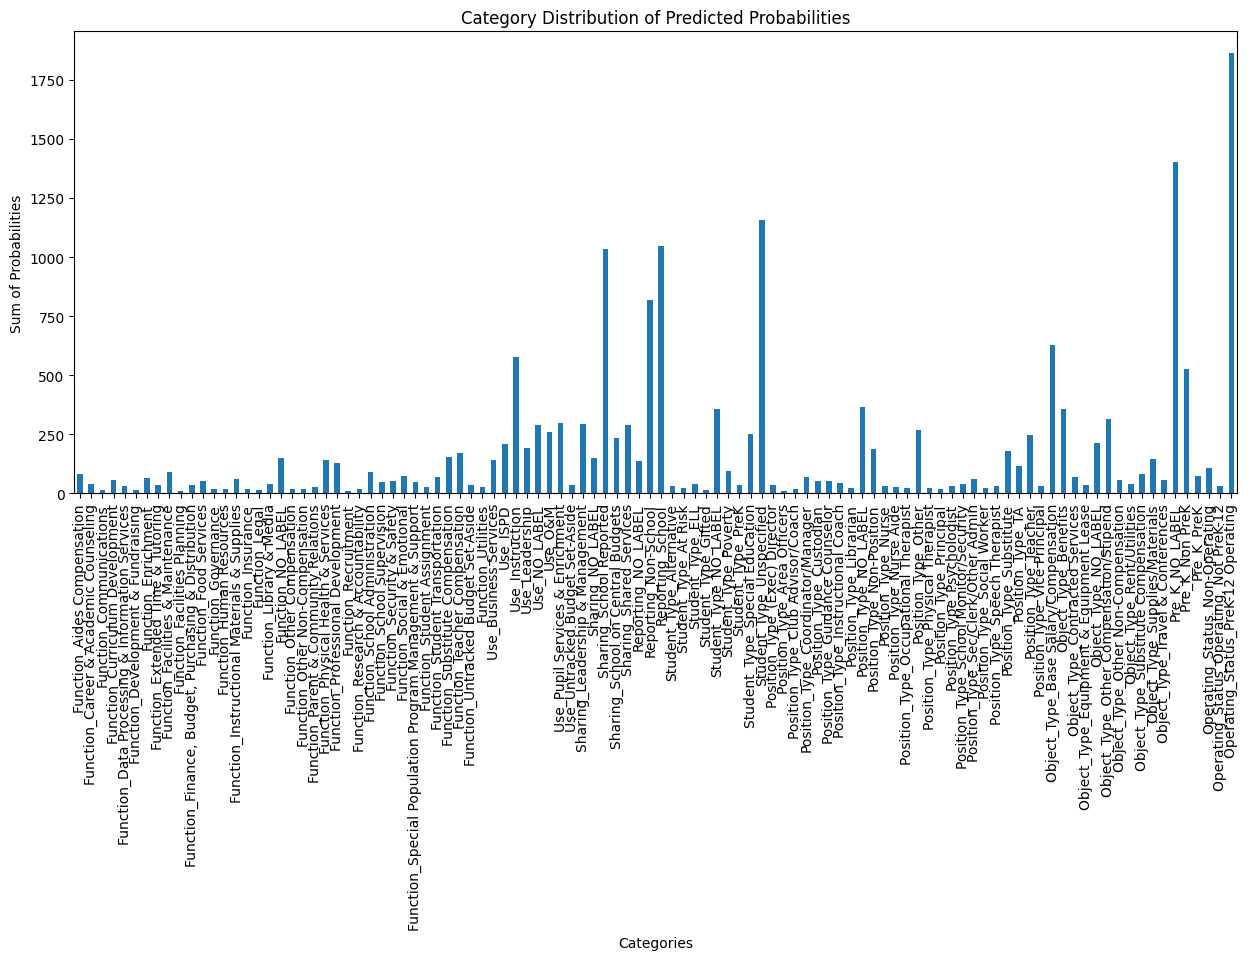

**Discussion**:  
This graph helps identify dominant categories in the dataset, allowing us to evaluate whether the model is biased toward certain categories or if the distribution aligns with the dataset's characteristics.

---
### **Heatmap of Predicted Probabilities**

**Graph Description**:  
The heatmap provides a detailed view of the predicted probabilities for a subset of samples and categories. Each cell represents the probability assigned by the model to a specific category for a given sample.

**Key Insights**:
- The heatmap highlights categories where the model consistently predicts high probabilities (dark shades) across samples.
- Some rows (samples) show clear confidence in specific categories, while others display more distributed probabilities, reflecting uncertainty.

**Code Snippet**:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Extract a subset for visualization (first 50 rows and a few columns for simplicity)
heatmap_data = predictions_df.iloc[:50, 1:20]  # Adjust column range as needed

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap of Predicted Probabilities (Subset)")
plt.xlabel("Categories")
plt.ylabel("Samples")
plt.show()
```
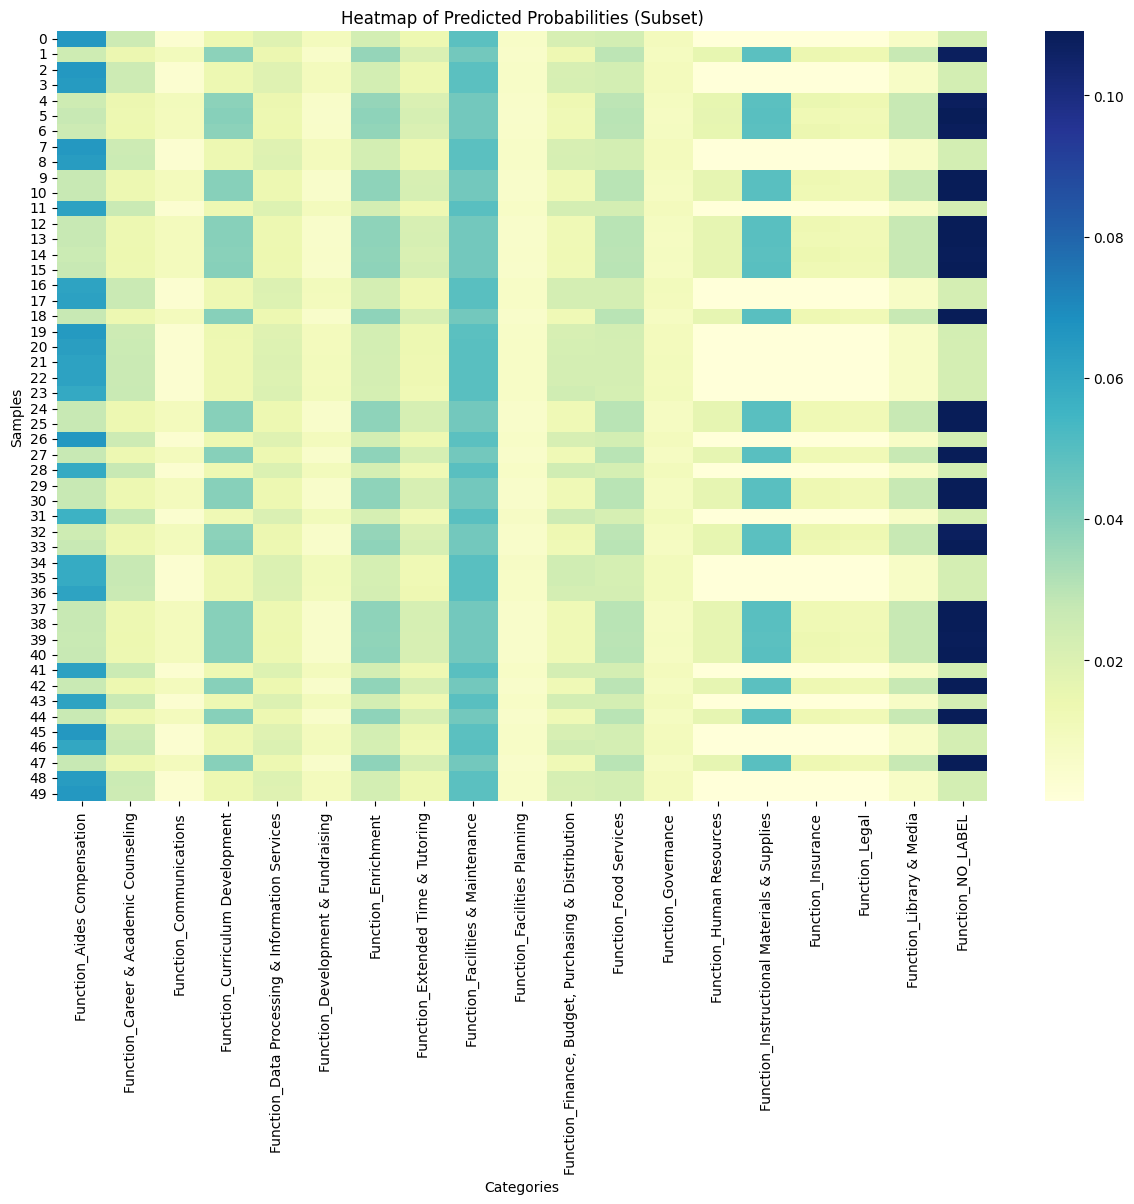

**Discussion**:  
The heatmap is useful for identifying patterns in the model's predictions. For example, if the model assigns high probabilities to only a few categories, it suggests strong confidence. Conversely, distributed probabilities across multiple categories indicate ambiguity in classification.

---

### **Top Predicted Categories for a Sample**

**Graph Description**:  
This horizontal bar chart shows the top predicted categories for a single sample, illustrating the probabilities assigned by the model to the most likely categories.

**Key Insights**:
- The highest probability category for the selected sample is "Operating_Status_PreK-12 Operating," followed by "Object_Type_Base Salary/Compensation."
- The chart provides a clear view of the model's confidence and the relative likelihood of each category.

**Code Snippet**:
```python
# Select a sample (e.g., first row)
sample_index = 0
sample_predictions = predictions_df.iloc[sample_index, 1:]  # Exclude 'Unnamed: 0'

# Sort predictions and pick the top 10 categories
top_predictions = sample_predictions.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
top_predictions.plot(kind='barh', figsize=(10, 6), title=f"Top Predicted Categories for Sample {sample_index}")
plt.xlabel("Predicted Probability")
plt.ylabel("Categories")
plt.show()
```
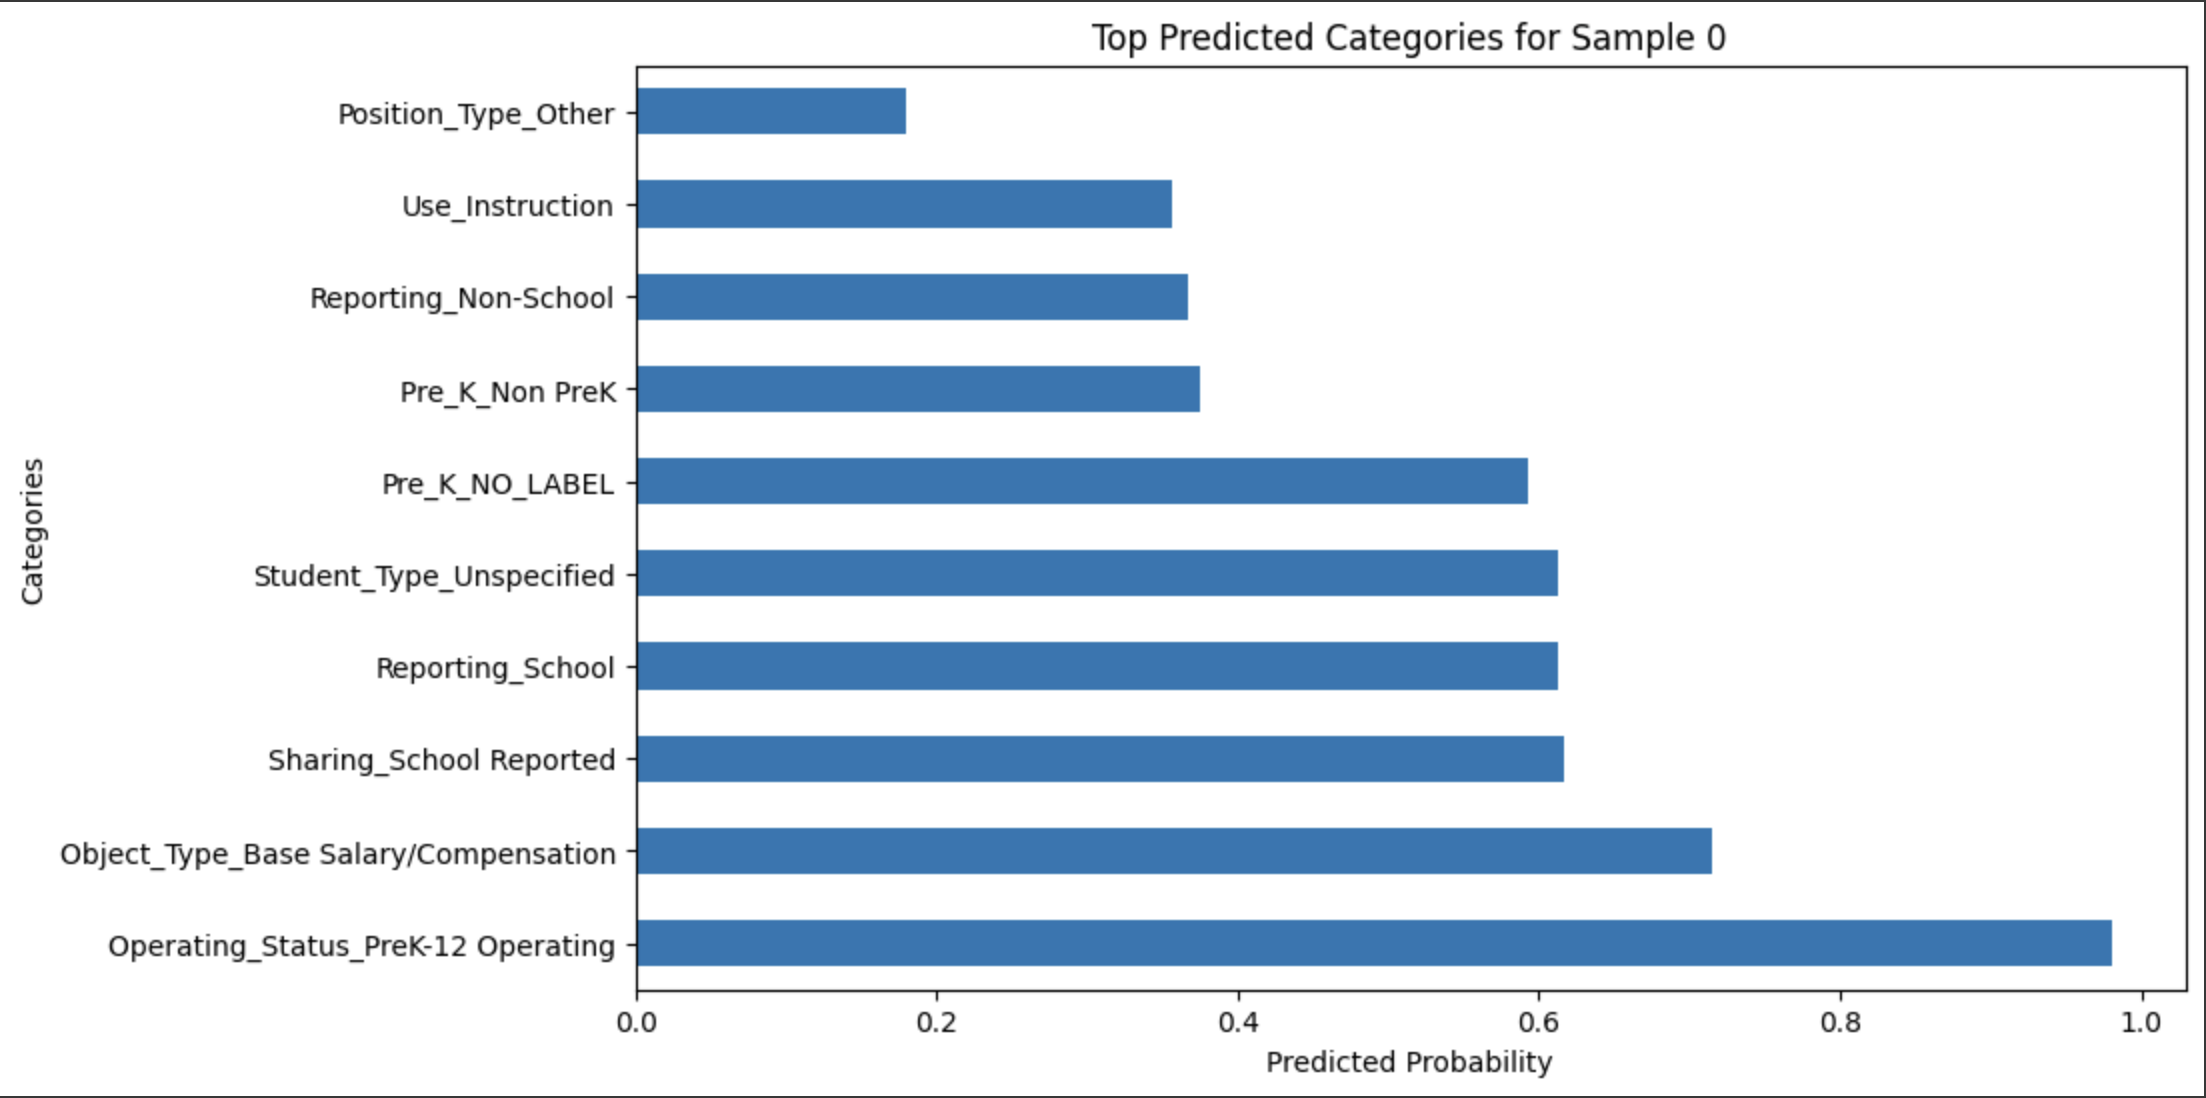

**Discussion**:  
This chart provides an interpretable view of the model's decision-making for individual samples. It allows us to validate whether the predictions align with expectations and helps identify potential areas of misclassification.

---

### **Challenges and Recommendations**

1. **Prediction Confidence**:
   - The log loss score indicates the need for better confidence calibration. Techniques such as Platt scaling or isotonic regression could improve probabilistic outputs.

2. **Imbalanced Data**:
   - Certain categories are underrepresented in the dataset, potentially biasing the model toward dominant classes. Oversampling or applying class weights could address this issue.

3. **Advanced Text Representation**:
   - Employing advanced techniques like TF-IDF or transformer-based models (e.g., BERT) could improve the representation of textual features, capturing deeper semantic relationships.

4. **Exploring Ensemble Models**:
   - Methods like Random Forests or Gradient Boosting could complement logistic regression, potentially reducing misclassification rates and improving log loss.

---


The logistic regression model demonstrated strong performance, achieving an accuracy of **92.8%** and providing interpretable insights into feature relevance. While the results are promising, the log loss of **1.958** highlights areas for improving prediction confidence. Textual features played a critical role in refining predictions, and categorical features like `Position_Type` and `Function` were identified as key predictors.

Through these experiments, the project validated the potential of machine learning to automate budget classification, reducing administrative burden and increasing accuracy. Future work can focus on refining probabilistic outputs, addressing class imbalance, and exploring advanced models to further enhance performance.

##**Conclusion**


This project highlights how machine learning can revolutionize the way school budget data is categorized. By applying logistic regression, combined with thoughtful data preprocessing and feature engineering, I developed a reliable model that simplifies the challenging task of classifying budget line items. The results show promising accuracy and valuable insights into the data, demonstrating the potential of this approach to streamline and enhance budget management in educational institutions.

---

### **Key Takeaways**

1. **Model Performance**:
   - The model achieved an accuracy of **92.8%**, successfully classifying most budget items into the correct categories.
   - A log loss score of **1.958** revealed that while the model performs well, there’s room to improve its confidence, especially in predicting less common or ambiguous categories.

2. **Feature Insights**:
   - **Categorical Features**: Features like `Position_Type` and `Function` played a significant role in the model’s predictions, helping distinguish between instructional and operational expenses.
   - **Textual Features**: The inclusion of descriptions, such as `Object_Description`, added critical context to the model’s decisions, enabling it to capture nuances that numerical data alone cannot provide.

3. **Visualizations**:
   - The **Category Distribution Chart** revealed which categories dominate the predictions, reflecting both the data structure and the model's performance.
   - The **Heatmap of Predicted Probabilities** highlighted the model’s confidence across categories, showing both areas of strength and uncertainty.
   - The **Top Predicted Categories for a Sample** chart gave an easy-to-understand breakdown of the model’s thought process for individual predictions.

---

### **Strengths of the Project**

1. **Efficiency**:  
   The automation of budget classification reduces the time and effort required for manual categorization, allowing staff to focus on higher-value tasks.

2. **Interpretability**:  
   Logistic regression provided clear insights into which features were most influential, making the model’s behavior easy to explain and trust.

3. **Robust Data Handling**:  
   The careful preprocessing of numeric, categorical, and textual data ensured that the model could work effectively with real-world budget data.

---

### **Challenges and Opportunities**

1. **Confidence Calibration**:  
   Although the model performs well, its predictions could be more refined. Overconfident incorrect predictions contributed to the log loss score, which can be improved with better probability calibration techniques.

2. **Imbalanced Data**:  
   Some budget categories were underrepresented, making it harder for the model to predict them accurately. Addressing this with advanced techniques like oversampling or weighting could improve fairness and balance.

3. **Textual Complexity**:  
   While basic text vectorization worked well, using more advanced techniques like word embeddings or pretrained language models could further enhance the model’s understanding of textual features.

---

### **Recommendations for Future Work**

1. **Advanced Models**:  
   Experimenting with ensemble methods like Random Forests or Gradient Boosting could improve performance and address some of the current limitations.

2. **Confidence Improvement**:  
   Implementing techniques like Platt scaling could help ensure the model’s probabilities are well-calibrated, reducing penalties for overconfidence.

3. **Improved Text Representation**:  
   Exploring modern NLP techniques like BERT or TF-IDF could extract deeper meaning from textual descriptions, leading to better predictions.

4. **Real-Time Integration**:  
   Deploying the model into a real-time budget management system would provide immediate feedback and streamline decision-making for administrators.

---

### **Final Thoughts**

This project showcases the power of machine learning in transforming budget management for schools. By automating the classification process, we not only reduce manual effort but also gain valuable insights into how resources are allocated. While the results are promising, there’s room to build on this foundation—exploring advanced models, handling imbalanced data, and improving text processing can take this solution to the next level.

Ultimately, this work highlights the potential of data-driven decision-making in education, paving the way for more efficient and transparent resource management that supports schools in achieving their goals. With continued refinement, this approach can become an essential tool for educational institutions striving for smarter, data-informed financial planning.

## **References**



1. **Datacamp Website**:  
   DataCamp. (2020). *School Budgeting with Machine Learning in Python*. Retrieved from [https://www.datacamp.com/projects](https://www.datacamp.com/projects)

2. **GitHub Repository**:  
   Goodboychan. (2020). *School Budgeting with Machine Learning in Python*. Retrieved from [https://github.com/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-06-05-01-School-Budgeting-with-Machine-Learning-in-Python.ipynb](https://github.com/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-06-05-01-School-Budgeting-with-Machine-Learning-in-Python.ipynb)


3. **Scikit-learn Documentation**:  
   Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830. Retrieved from [https://scikit-learn.org/](https://scikit-learn.org/)

4. **Pandas Documentation**:  
   McKinney, W. (2010). *Data Structures for Statistical Computing in Python*. Proceedings of the 9th Python in Science Conference, 51–56. Retrieved from [https://pandas.pydata.org/](https://pandas.pydata.org/)

5. **Matplotlib Documentation**:  
   Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90–95. Retrieved from [https://matplotlib.org/](https://matplotlib.org/)

6. **Seaborn Documentation**:  
   Waskom, M., et al. (2021). *Seaborn: Statistical Data Visualization*. Journal of Open Source Software, 6(60), 3021. Retrieved from [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

7. **Log Loss Metric in Machine Learning**:  
   Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer. Retrieved from [https://www.springer.com/](https://www.springer.com/)

8. **Educational Finance and Budgeting Research**:  
   Baker, B. D., Farrie, D., & Sciarra, D. G. (2016). *Is School Funding Fair? A National Report Card.* Education Law Center. Retrieved from [https://edlawcenter.org/](https://edlawcenter.org/)

   ---
   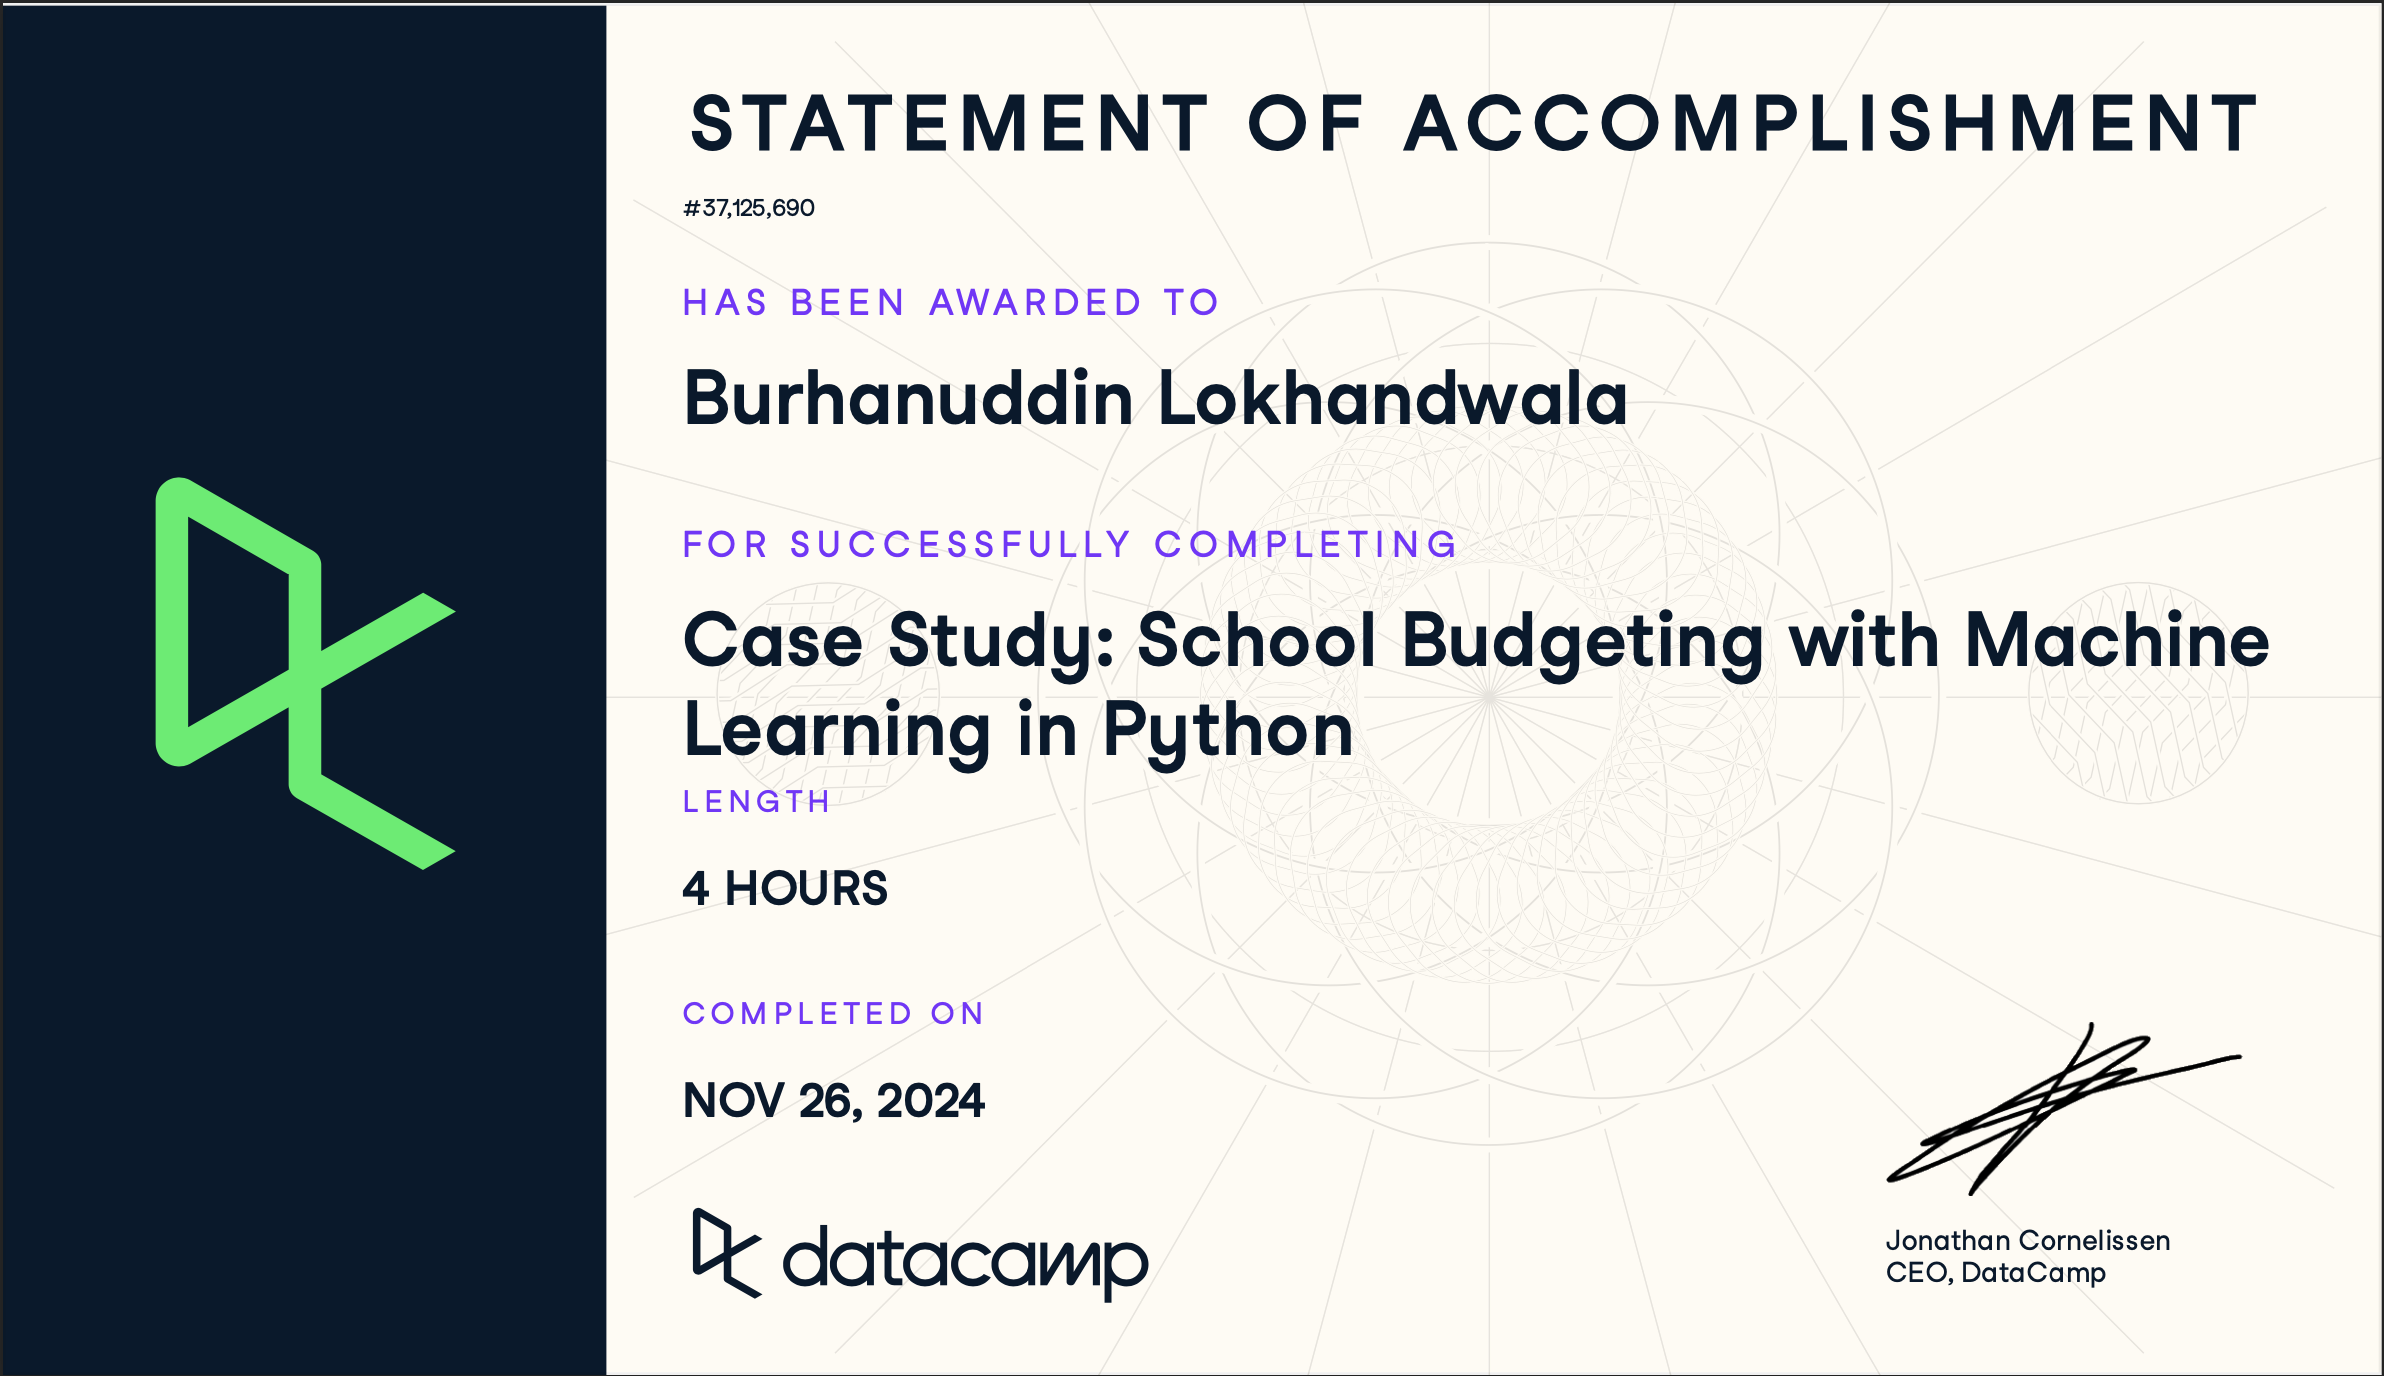